# i.Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

---
### ***House Price Predict***

***Dataset*** : House price prediction

***Tujuan*** : 

*Project ini dibuat guna mengevaluasi konsep Machine Learning*

- Mampu memahami konsep Machine Learning secara keseluruhan.
- Mampu mempersiapkan data untuk digunakan dalam model Supervised Learning (Classification atau Regression).
- Mampu mengimplementasikan Supervised Learning (Classification atau Regression) dengan data yang dipilih.
- Mampu melakukan Hyperparameter Tuning dan Model Improvement.
- Mampu melakukan Model Deployment.

---

---
##### ***Latar Belakang***

*Pertumbuhan ekonomi yang pesat, urbanisasi, dan peningkatan pendapatan masyarakat telah memberikan dorongan signifikan bagi industri properti di berbagai belahan dunia. Bisnis properti mencakup segala aspek, mulai dari pembangunan perumahan, komersial, hingga properti industri, yang semuanya memiliki dampak signifikan terhadap ekonomi, masyarakat, dan lingkungan.*

---

---
##### ***Problem Statement:***

*Pasar properti, memberikan peluang menarik bagi analis data untuk menganalisis dan memprediksi ke mana arah harga properti. Memprediksi harga properti menjadi semakin penting dan berguna. Harga properti merupakan indikator yang baik untuk kondisi pasar secara keseluruhan dan kesehatan ekonomi suatu negara. Semoga saja model ini dapat membantu agen properti dan pembeli untuk mendapat perkiraan harga yang akurat.*

---

# ii.Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
import pickle
import plotly.express  as px 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer , OutlierTrimmer
from imblearn.over_sampling import SMOTENC
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import  AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

print("Import Libaries Telah Berhasil!")

Import Libaries Telah Berhasil!


# iii.Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Load data dari CSV
df = pd.read_csv('House_Price_Predic.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


#### **TABLE DESC:**
| No. | Nama Kolom | Deskripsi |
|-----|----------- | --------- |
| 1 | **Date** | This column contains the date when a particular property transaction occurred. |
| 2 | **Price** | This column contains the selling price of the house in question. |
| 3 | **Bedrooms** | This column indicates the number of bedrooms in the house. |
| 4 | **Bathrooms** | This column shows the number of bathrooms in the house, including both full and half bathrooms. |
| 5 | **Sqft_living** | This column represents the total square footage of the living space (interior) of the house. |
| 6 | **Sqft_lot** | This column is likely the total square footage of the land or plot on which the house is built. |
| 7 | **Floors** | This column indicates the number of floors or levels in the house. |
| 8 | **Waterfront** | It's a binary column that could indicate whether the property has a waterfront view or not (e.g., 1 for waterfront, 0 for no waterfront). |
| 9 | **View** | This column might describe the level of view the property has, typically on a scale from 0 to 4, with 0 being no view and 4 being an excellent view. |
| 10 | **Condition** | This column could represent the overall condition of the property, often rated on a scale from 1 to 5, with 1 being poor and 5 being excellent. |
| 11 | **Sqft_above** | This column likely shows the square footage of the interior living space above ground level. |
| 12 | **Sqft_basement** | This column should contain the square footage of any basement space in the house. |
| 13 | **Yr_built** | This is the year the house was originally built. |
| 14 | **Yr_renovated** | If the house has been renovated, this column may contain the year when the renovation took place. |
| 15 | **Street** | This column might provide information about the street or address of the property. |
| 16 | **City** | It represents the city where the property is located. |
| 17 | **Statezip** | This column could contain information about the state and ZIP code of the property. |
| 18 | **Country** | In this context, it's likely that all entries are from the same country, so this column may not provide much variation. |

In [3]:
# Menampilkan 10 data teratas
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [4]:
# Menampilkan 10 data terbawah
df.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4590,2014-07-08 00:00:00,380680.555556,4.0,2.50,2620,8331,2.0,0,0,3,2620,0,1991,0,13602 SE 186th Pl,Renton,WA 98058,USA
4591,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126,USA
4592,2014-07-08 00:00:00,252980.000000,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA
4593,2014-07-08 00:00:00,289373.307692,3.0,2.50,2538,4600,2.0,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092,USA
4594,2014-07-09 00:00:00,210614.285714,3.0,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

*Kesimpulan:*
- Data diatas memiliki total 4600 entries
- Data diatas memiliki total 16 columns
- 4 columns bertipe float
- 9 columns bertipe integer
- 5 columns bertipe objek
- Memory usage sebesar 647.0+ KB

In [6]:
# Mengecek missing value
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

*Kesimpulan:*

Tidak terdapat missing value dalam dataset ini.

In [7]:
# Mengecek data duplicate 
df.duplicated().sum()

0

*Kesimpulan:*

Tidak terdapat duplicate data dalam dataset ini.

In [8]:
# Duplicate Data
df_duplicate = df.copy()

In [9]:
# Melihat deskripsi data
df_duplicate.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


*kesimpulan:*
- **price:** Harga rumah dalam dataset ini. Rata-rata harga rumah adalah sekitar $551,963. Variabilitas harga cukup tinggi, dengan standar deviasi sekitar $563,834. Harga rumah berkisar dari $0 hingga $26,590,000.
- **yr_renovated:** Tahun renovasi terakhir rumah. Rata-ratanya adalah sekitar 808.61. Banyak rumah dalam dataset ini tidak pernah mengalami renovasi, ditunjukkan dengan nilai 0. Rumah-rumah yang mengalami renovasi memiliki nilai tahun renovasi berkisar dari 0 hingga 2014.
- Ada harga rumah yang 0, terlihat dari kolom min pada 'price' , hal ini akan menimbulkan pertanyaan , maka akan kita cek lebih lanjut pada kolom price.

**Saya akan menghapus row data rumah yang harganya = 0, karena tidak ada penjelasan mengapa harga rumah bisa menjadi = 0.**

In [10]:
# Menghapus row data rumah dengan harga = 0
df_duplicate = df_duplicate.drop(df_duplicate[df_duplicate['price'] == 0].index)
df_duplicate['price'].value_counts()

price
300000.0     42
400000.0     31
600000.0     29
440000.0     29
450000.0     29
             ..
325900.0      1
684680.0      1
609900.0      1
1635000.0     1
220600.0      1
Name: count, Length: 1740, dtype: int64

In [11]:
# Menambahkan kolom bernama 'house_age' untuk menggambarkan berapa usia rumah tersebut
house_age = 2014 - df_duplicate['yr_built']
df_duplicate['house_age'] = house_age

In [12]:
# Melakukan drop kolom 'yr_built' karena sudah diwakilkan dengan kolom baru 'house_age'
df_duplicate.drop(['yr_built'], axis = 1,inplace=True)

In [13]:
# Melakukan drop kolom street karena semua nilainya unik dan tidak berpengaruh pada harga rumah
df_duplicate.drop(['street'],axis=1,inplace=True)

In [14]:
# Melakukan drop date karena tidak ada hubungannya dengan harga rumah
df_duplicate.drop(['date'],axis=1,inplace=True)

In [15]:
# Melakukan drop kolom country , karena hanya ada 1 unique value yaitu USA.
df_duplicate.drop(['country'],axis=1,inplace=True)

In [16]:
# Menambah kolom baru renovated , untuk menunjukan apakah rumah pernah direnovasi atau tidak
renovated1 = []
for i in df_duplicate['yr_renovated']:
    if i == 0:
        renovated1.append(0)
    else:
        renovated1.append(1)

df_duplicate['renovated'] = renovated1

In [17]:
# Melakukan drop kolom yr_renovated , karena sudah diwakilkan dengan kolom renovated yang baru dibuat
df_duplicate.drop(['yr_renovated'],axis=1,inplace=True)

**Column "bathrooms" adalah column jumlah kamar mandi, namus beberapa data ada yang memiliki value desimal. Saya akan membulatkan value desimal tersebut menjadi bilangan bulat, agar menggambarkan jumlah kamar mandi yang sifat nya satuan.**

In [18]:
df_duplicate['bathrooms'] = df_duplicate['bathrooms'].round(0)
df_duplicate['floors'] = df_duplicate['floors'].round(0)
df_duplicate['bathrooms'].value_counts()

bathrooms
2.0    2937
1.0     756
3.0     569
4.0     262
5.0      16
6.0       7
0.0       2
8.0       1
7.0       1
Name: count, dtype: int64

In [19]:
df_duplicate

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,house_age,renovated
0,3.130000e+05,3.0,2.0,1340,7912,2.0,0,0,3,1340,0,Shoreline,WA 98133,59,1
1,2.384000e+06,5.0,2.0,3650,9050,2.0,0,4,5,3370,280,Seattle,WA 98119,93,0
2,3.420000e+05,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,Kent,WA 98042,48,0
3,4.200000e+05,3.0,2.0,2000,8030,1.0,0,0,4,1000,1000,Bellevue,WA 98008,51,0
4,5.500000e+05,4.0,2.0,1940,10500,1.0,0,0,4,1140,800,Redmond,WA 98052,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,2.0,1510,6360,1.0,0,0,4,1510,0,Seattle,WA 98133,60,1
4596,5.343333e+05,3.0,2.0,1460,7573,2.0,0,0,3,1460,0,Bellevue,WA 98007,31,1
4597,4.169042e+05,3.0,2.0,3010,7014,2.0,0,0,3,3010,0,Renton,WA 98059,5,0
4598,2.034000e+05,4.0,2.0,2090,6630,1.0,0,0,3,1070,1020,Seattle,WA 98178,40,0


# iV.Exploratory Data Analysis (EDA)

> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### ***A.Bagaimana Distribusi Harga Pada Data Penjualan?***

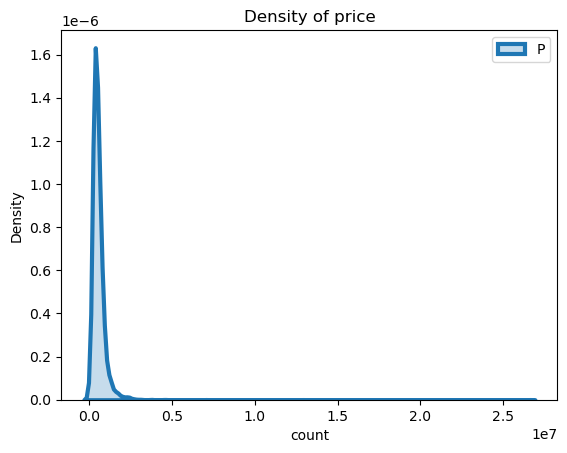

In [87]:
sns.distplot(df['price'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.xlabel("count")
plt.ylabel("Density")
plt.title("Density of price")
plt.legend("Price")
plt.show()

*Kesimpulan:*
- Terlihat harga penjualan rumah di Washington bersifat skewed.

### ***B.Apakah Rumah Yang Memiliki View Pantai, Memiliki Harga Yang Lebih Tinggi?***

<Axes: xlabel='waterfront', ylabel='price'>

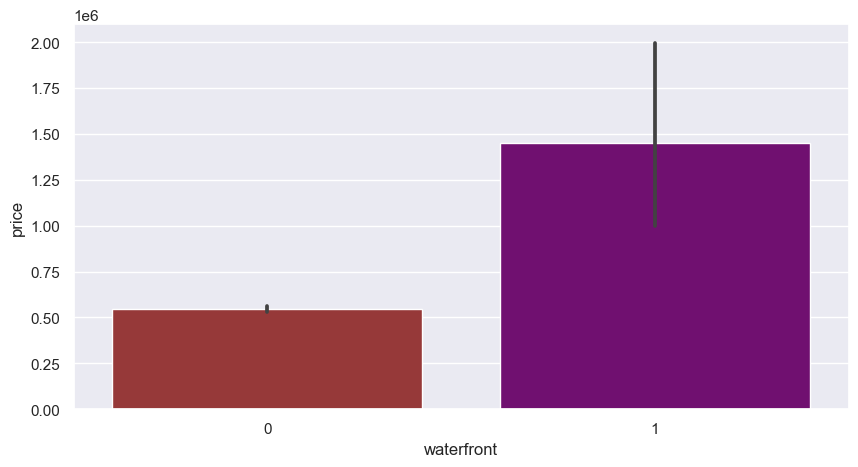

In [88]:
sns.set(rc={'figure.figsize':(10,5)})
cols = ['brown','purple']
sns.barplot(x='waterfront', y='price', palette= cols, data=df)

*Kesimpulan:*
- Rumah dengan view pantai biasanya harganya jauh lebih tinggi dibanding yang tidak memiliki view pantai

### ***C.Adakah Hubungan Antara Tingkat Rumah Dengan Harga?***

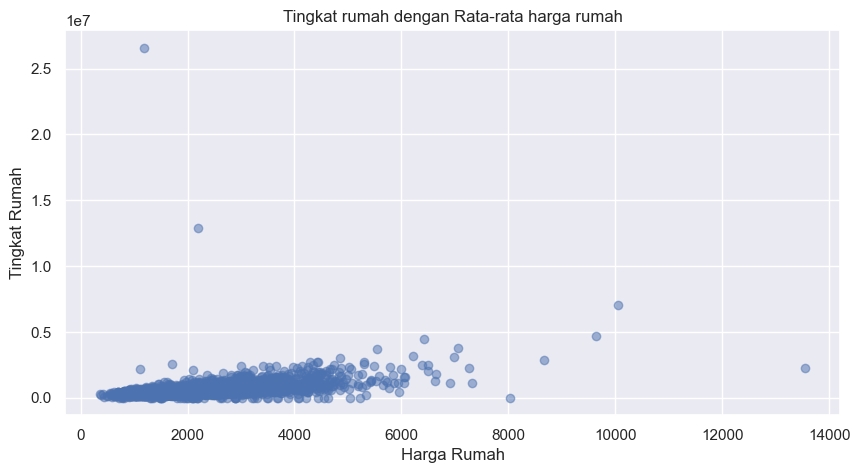

In [89]:
# Membuat scatter plot
plt.scatter('sqft_living', 'price', data=df, alpha=0.5)
# Menambahkan label sumbu dan judul
plt.xlabel('Harga Rumah')
plt.ylabel('Tingkat Rumah')
plt.title('Tingkat rumah dengan Rata-rata harga rumah')
# Menampilkan plot
plt.show()

*Kesimpulan:*
- Terlihat dari ada rumah yang tingkatannya rendah hanya 1 laintai, namun harganya paling mahal , mungkin ini karena rumah tersebut mewah dan sangat luas. Sedangkan ada rumah yang tinggi , namun harganya rendah , mungkin ini karena rumah tersebut tinggi namun sempit dan tidak nyaman dihuni.

### ***D.3 Kota Teratas Yang Menjual Harga Rumah Dengan Harga Tinggi***

In [99]:
# Menampilkan nilai mean kondisi rumah setiap kota
city_price= df.groupby('city')['price'].mean()

kondisi_df = pd.DataFrame(city_price)
City_mean_price =kondisi_df.sort_values('price',ascending=False)
top3city = City_mean_price.head(3)
top3city

,price
city,
Medina,2.046559e+06
Clyde Hill,1.321945e+06
Yarrow Point,1.194838e+06


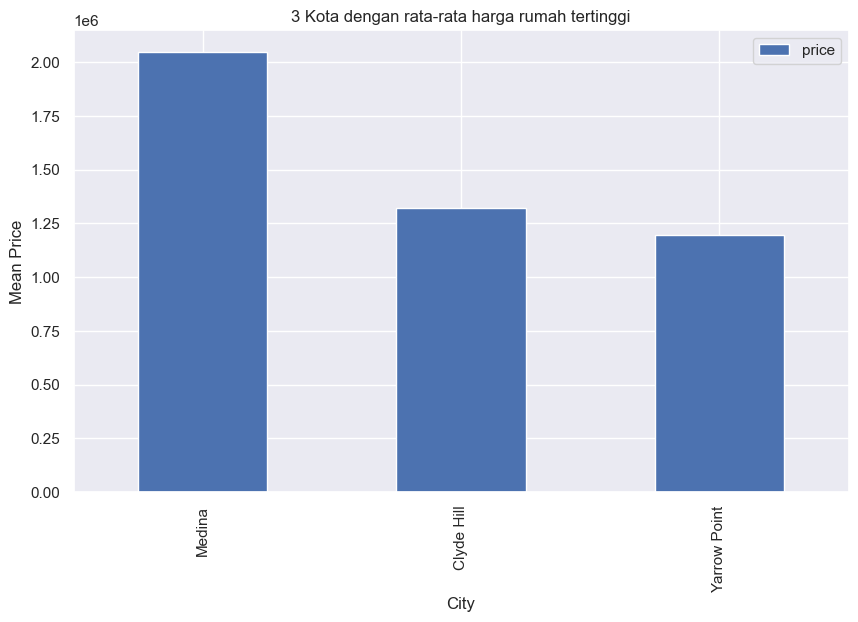

In [100]:
top3city.plot(kind='bar', figsize=(10,6))

plt.title('3 Kota dengan rata-rata harga rumah tertinggi')
plt.ylabel('Mean Price')
plt.xlabel('City')
# plt.xticks(rotation=0) 

plt.show()

*Kesimpulan:*
- Bisa dibilang di daerah tersebut merupakan rumah-rumah mewah dan bagus.

### ***E.Apakah ada Pengaruh Usia Rumah dengan Harga?***

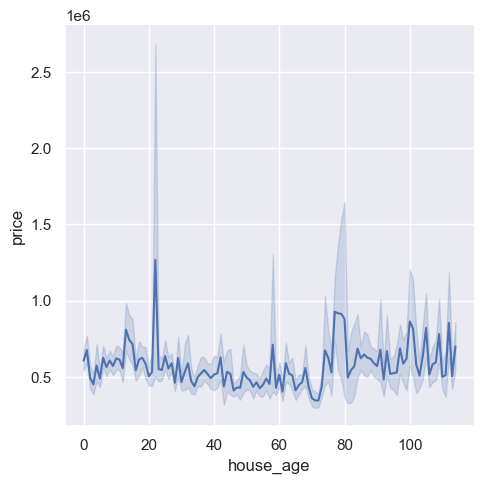

In [93]:
sns.set(rc={'figure.figsize':(10,5)})
sns.relplot(kind='line',
            x='house_age',
            y='price',
            data=df_duplicate
           )

*Kesimpulan:*
- Usia rumah tidak menjamin harga rumah. Bisa saja rumah yang sudah tua, namun karena nilai keaslian dan vintage nya menjadi lebih mahal.

### ***F.Apakah Rumah Yang Pernah Direnovasi Memiliki Tingkat Kondisi Yang Lebih Baik?***

<Axes: xlabel='renovated', ylabel='condition'>

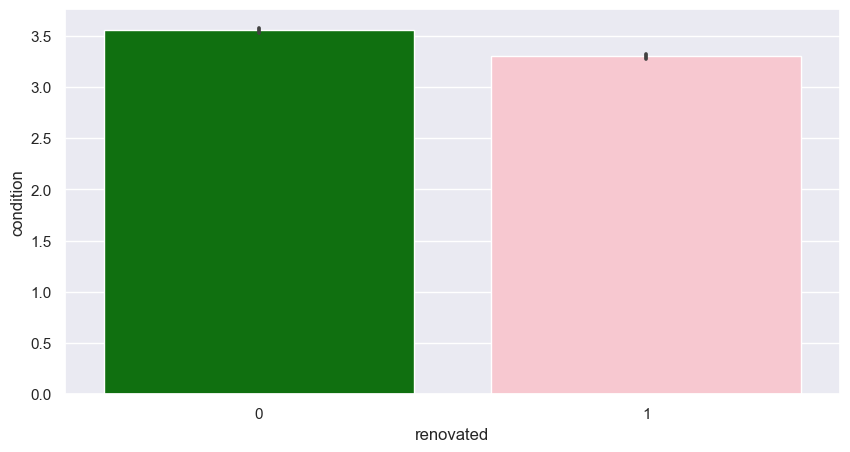

In [104]:
sns.set(rc={'figure.figsize':(10,5)})
cols = ['green','pink']
sns.barplot(x='renovated', y='condition', palette= cols, data=df_duplicate)

*Kesimpulan:*
- Rumah yang pernah direnovasi memiliki kondisi yang lebih baik. Namun begitu perbedaan kondisinya tidak terlalu jauh dengan yang tidak pernah direnovasi.

### ***G.Adakah Hubungan Antara Luas Ruang Tamu Dengan Harga?***

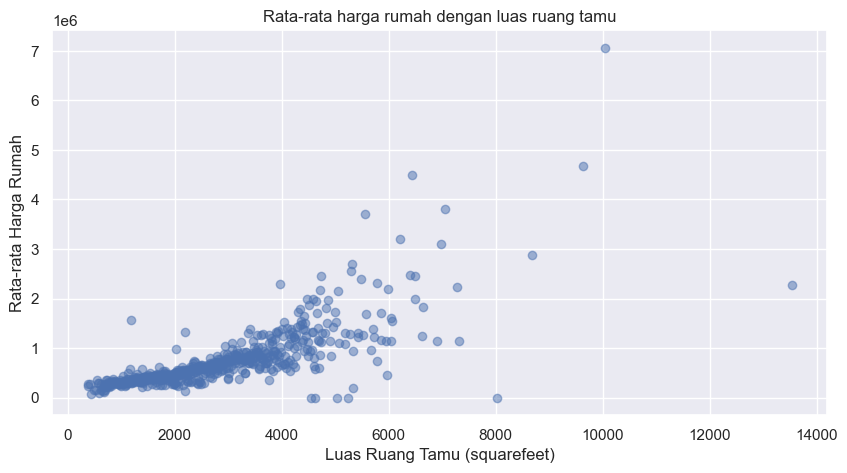

In [94]:
average_purchases = df.groupby('sqft_living')['price'].mean()
# Membuat scatter plot
plt.scatter(average_purchases.index, average_purchases.values, alpha=0.5)
# Menambahkan label sumbu dan judul
plt.xlabel('Luas Ruang Tamu (squarefeet)')
plt.ylabel('Rata-rata Harga Rumah')
plt.title('Rata-rata harga rumah dengan luas ruang tamu')
# Menampilkan plot
plt.show()

*Kesimpulan:*
- Dari scatter plot diatas dapat dilihat bahwa ada hubungan dengan trend positif antara harga rumah dengan luas ruang tamu, Artinya semakin besar luas ruang tamu , maka rumahnya juga akan semakin mahal.

# V.Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### ***1.Membagi Data Menjadi Numerical Dan Categorical***

**Data categorical:** 
- *Data yang mempresentasikan kategori atau kelompok dan tidak memiliki nilai yang dapat diukur secara numerik.*

**Data Numerical:**
- *Data numerical mengandung nilai yang dapat diukur atau dihitung secara matematis.*

In [21]:
# Divide category columns into cat_cols
cat_cols = df_duplicate[['waterfront','view','condition','renovated','city']]
# Divide numeric columns into num_cols
num_cols = df_duplicate[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors','sqft_above','sqft_basement','house_age']]

In [22]:
# Show categorical dataframe
cat_cols.head()

,waterfront,view,condition,renovated,city
0,0,0,3,1,Shoreline
1,0,4,5,0,Seattle
2,0,0,4,0,Kent
3,0,0,4,0,Bellevue
4,0,0,4,1,Redmond


In [23]:
# Show numerikal dataframe
num_cols.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,house_age
0,3.0,2.0,1340,7912,2.0,1340,0,59
1,5.0,2.0,3650,9050,2.0,3370,280,93
2,3.0,2.0,1930,11947,1.0,1930,0,48
3,3.0,2.0,2000,8030,1.0,1000,1000,51
4,4.0,2.0,1940,10500,1.0,1140,800,38


### ***2.Cardinality Handling***

In [24]:
# Handling cardinality hanya untuk column categorical
for x in cat_cols.columns:
    print(f'Cardinality Column {x}:', cat_cols[x].nunique())

Cardinality Column waterfront: 2
Cardinality Column view: 5
Cardinality Column condition: 5
Cardinality Column renovated: 2
Cardinality Column city: 44


*Kesimpulan:*
- Column "city" memiliki Cardinality sebesar 44, yang termasuk high cardinality.
- Column "waterfront", "view", "condition", "renovated" memiliki cardinality yang rendah, maka mereka termasuk dalam low cardinality.

##### **A.Handling Cardinality "city" Columns**

In [25]:
# Mengecek unique value kolom city
cat_cols['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

*Kesimpulan:*

Diatas merupakan nama-nama kota yang terletak pada negara United State of America. Saya akan membagi nama-nama kota di atas berdasarkan letak geografisnya terhadap kota terbesarnya yaitu kota seattle dengan pembagiannya seperti berikut.

**1.Seattle**:
- Seattle

**2.Wilayah Timur**
- Bellevue
- Redmond
- Kirkland
- Sammamish
- Issaquah
- Woodinville
- Newcastle

**3.Seattle Utara**
- Shoreline
- Lake Forest Park
- Kenmore

**4.Wilayah Selatan Seattle**
- Renton
- Kent
- Auburn
- Des Moines
- Federal Way
- Burien
- Tukwila
- SeaTac
- Normandy Park

**5.Wilayah Barat Daya Seattle**
- Mercer Island
- Medina
- Clyde Hill
- Yarrow Point
- Beaux Arts Village

**6.Wilayah Selatan Pegunungan Cascade**
- Black Diamond
- Covington
- Enumclaw

**7.Wilayah Pegunungan Cascade**
- Maple Valley
- North Bend
- Snoqualmie
- Duvall
- Carnation
- Ravensdale
- Fall City
- Skykomish
- Snoqualmie Pass

**8.Wilayah Lainnya**
- Bothell
- Inglewood-Finn Hill
- Algona
- Vashon
- Preston
- Milton
- Pacific

In [26]:
# Membuat fungsi untuk mengubah nama kota ke area
def klasifikasi_kota(kota):
    if pd.isna(kota):
        pass
    elif kota in ['Shoreline','Lake Forest Park','Kenmore']:
        return 1
    elif kota in ['Seattle']:
        return 2
    elif kota in ['Bellevue','Redmond','Kirkland','Sammamish','Issaquah','Woodinville','Newcastle']:
        return 3
    elif kota in ['Renton','Kent','Auburn','Des Moines','Federal Way','Burien','Tukwila','SeaTac','Normandy Park']:
        return 4
    elif kota in ['Mercer Island','Medina','Clyde Hill','Yarrow Point','Beaux Arts Village']:
        return 5
    elif kota in ['Black Diamond','Covington','Enumclaw']:
        return 6
    elif kota in ['Maple Valley','North Bend','Snoqualmie','Duvall','Carnation','Ravensdale','Fall City','Skykomish','Snoqualmie Pass']:
        return 7
    elif kota in ['Bothell','Inglewood-Finn Hill','Algona','Vashon','Preston','Milton','Pacific']:
        return 8

In [27]:
# Membuat kolom baru area
cat_cols['area'] = cat_cols['city'].apply(klasifikasi_kota)
cat_cols['area']

0       1
1       2
2       4
3       3
4       3
       ..
4595    2
4596    3
4597    4
4598    2
4599    6
Name: area, Length: 4551, dtype: int64

In [28]:
# Melihat categorical column yang sudah diperbaharui
cat_cols['price'] = df_duplicate['price']

In [29]:
# Melihat jumlah dari unique value column area
cat_cols['area'].value_counts()

area
2    1561
3    1207
4     999
7     300
1     222
5     107
8      78
6      77
Name: count, dtype: int64

In [30]:
# Menghapus column city karena sudah diwakilkan dengan column area dengan lebih baik (tidak high cardinal)
cat_cols.drop(['city'],axis=1,inplace=True)

### ***3.Feature Selection***

In [32]:
# Membagi column categorical dan numerical
cols_num = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','house_age']
cols_cat = ['waterfront','view','condition','city','renovated','area','price']


<Axes: >

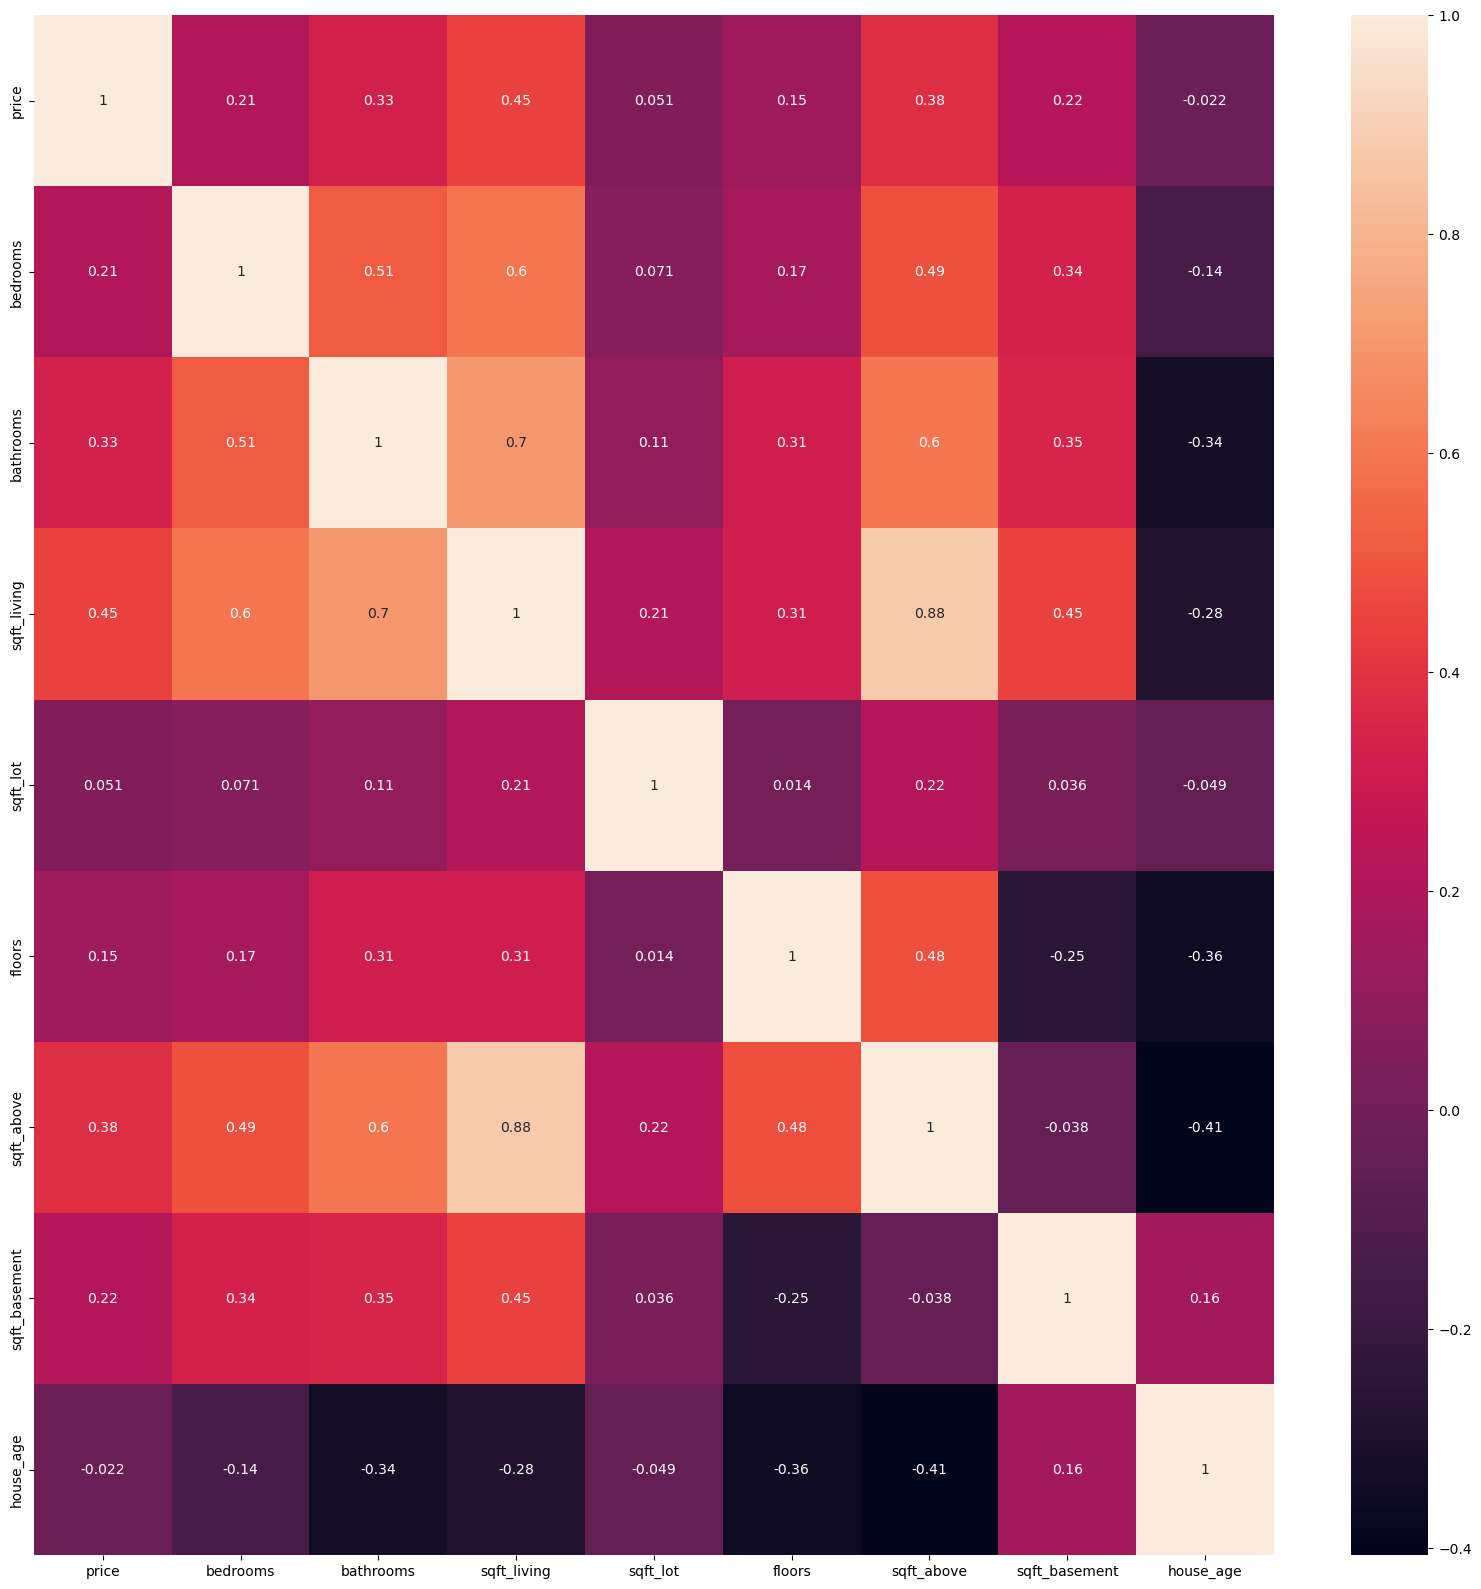

In [33]:
# Melakukan plot temp_numeric_cols kedalam heatmap
plt.figure(figsize=(20,20)) 
sns.heatmap(df_duplicate[cols_num].corr(method='pearson'),annot=True)

*Kesimpulan:*

Dapat di lihat dari heatmap correlation di atas, korelasinya cukup besar dengan harga rumah adalah:
- bedrooms
- bathrooms
- sqft_living
- floors
- sqft_above
- sqft_basement

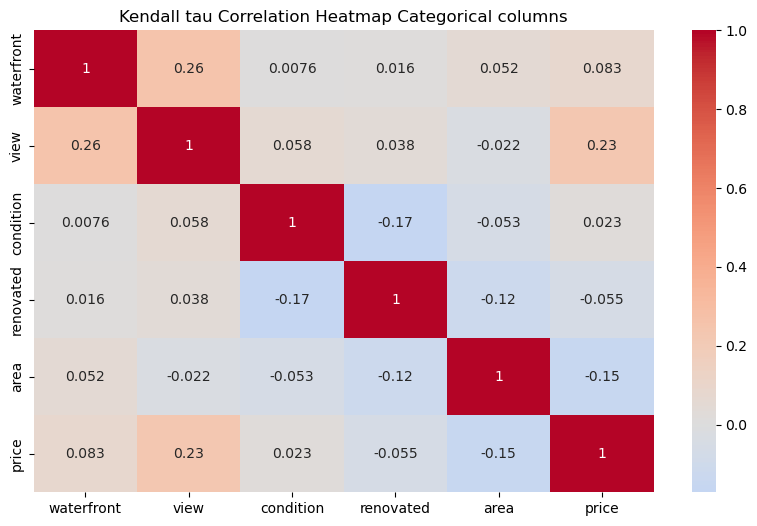

In [34]:
kendall_corr_matrix = cat_cols.corr(method=lambda x, y: kendalltau(x, y).correlation)

plt.figure(figsize=(10, 6))
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Kendall tau Correlation Heatmap Categorical columns')
plt.show()

*Kesimpulan:*

Dapat dilihat dari heatmap correlation diatas, column categorical dengan target "price" dipilih beberapa feature dengan korelasi tertinggi:
- area 
- view
- conditioon

**Jadi, feature yang dipilih untuk dimasukan kedalam model adalah:**
- **Area** yang berbentuk Categorical
- **View** yang berbentuk Categorical
- **Condition** yang berbentuk Categorical
- **Bedrooms** yang berbentuk Numerical
- **Bathrooms** yang berbentuk Numerical
- **Sqft_living** yang berbentuk Numerical
- **Floors** yang berbentuk Numerical
- **Sqft_above** yang berbentuk Numerical
- **Sqft_basement** yang berbentuk Numerical

In [36]:
# Memasukan feature selected kedalam dataframe baru
ftr_selected = df_duplicate[['price','view','bedrooms','bathrooms','sqft_living','floors','sqft_above','sqft_basement','condition']]
ftr_selected['area'] = cat_cols['area']
ftr_selected.head()

,price,view,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,condition,area
0,313000.0,0,3.0,2.0,1340,2.0,1340,0,3,1
1,2384000.0,4,5.0,2.0,3650,2.0,3370,280,5,2
2,342000.0,0,3.0,2.0,1930,1.0,1930,0,4,4
3,420000.0,0,3.0,2.0,2000,1.0,1000,1000,4,3
4,550000.0,0,4.0,2.0,1940,1.0,1140,800,4,3


*Kesimpulan:*

Saya membuat dataframe baru yang bernama "ftr_selected" dan di dalam dataframe ini berisi feature-feature yang sudah dipilih berdasarkan nilai korelasi dengan column "price".

### ***4.Split Data***

In [37]:
# Membagi data hasil pemilihan feature kedalam X(feature) dan y(target)
X = ftr_selected.drop(['price'], axis=1)
y = ftr_selected['price']

In [38]:
# Splitting antara Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20)

print('Train size', X_train.shape)
print('Test size', X_test.shape)
X_train.head()

Train size (3640, 9)
Test size (911, 9)


,view,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,condition,area
799,0,3.0,2.0,1180,1.0,940,240,4,3
3547,0,3.0,2.0,2410,1.0,1860,550,4,4
2982,0,3.0,2.0,1860,2.0,1860,0,3,7
287,0,3.0,2.0,1410,1.0,1410,0,3,4
2634,3,4.0,4.0,3010,2.0,1940,1070,4,2


In [39]:
# Membagi lagi data test dan train ke data kategorikal dan data numerikal
# Data train numerikal
X_train_num = X_train[['bedrooms','bathrooms','sqft_living','floors','sqft_above','sqft_basement']]
# Data test numerikal
X_test_num = X_test[['bedrooms','bathrooms','sqft_living','floors','sqft_above','sqft_basement']]
X_test_num.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement
3286,4.0,4.0,3770,2.0,2830,940
2352,2.0,2.0,982,2.0,806,176
3395,3.0,2.0,2320,3.0,2320,0
2938,3.0,3.0,3240,2.0,3240,0
648,3.0,1.0,1050,1.0,1050,0


In [40]:
# Data train categorical
X_train_cat = X_train[['area','view','condition']]
# Data test categorical
X_test_cat = X_test[['area','view','condition']]
X_train_cat.head()

,area,view,condition
799,3,0,4
3547,4,0,4
2982,7,0,3
287,4,0,3
2634,2,3,4


### ***5.Cek Skewness Data Numerical***

In [41]:
# Melihat Skewness dari column X_train_num
for i in X_train_num:
    skew = X_train_num[i].skew()
    print('Skewness of column', i, 'is', skew)

Skewness of column bedrooms is 0.4533580005797982
Skewness of column bathrooms is 1.1908781083649216
Skewness of column sqft_living is 1.878710429288805
Skewness of column floors is 0.31432645360950207
Skewness of column sqft_above is 1.4947947591577937
Skewness of column sqft_basement is 1.733253552015664


In [43]:
# Melihat nialai mana yang terdistribusi normal dan skewed
# Untuk menampung kolom yang masuk dalam skewness normal
normal = []
# Untuk menampung kolom yang masuk dalam skewness skewed  
skewed = []  

# Untuk mencari kolom mana yang skewed atau normal
for column in X_train_num.columns:  
    skewness = X_train_num[column].skew()
# Syarat
    if skewness < -0.5 or skewness > 0.5:  
# Memasukan ke variabel penampung skewed
        skewed.append(column)
# Syarat  
    elif skewness >= -0.5 or skewness <= 0.5:  
# Memasukan ke variabel penampung normal
        normal.append(column)  

In [44]:
print (f'Kolom yang termasuk distribusi normal adalah {normal}')
print (f'Kolom yang termasuk distribusi skewed adalah {skewed}')

Kolom yang termasuk distribusi normal adalah ['bedrooms', 'floors']
Kolom yang termasuk distribusi skewed adalah ['bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement']


In [ ]:
# Melihat jumlah outlier pada setiap column di X_train_num
threshold = 3
outlier_counts = {}

for col in X_train_num.columns:
    data_skew = X_train_num[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    outlier_counts[col] = len(outliers[0])

for col, count in outlier_counts.items():
    print(f"Jumlah outlier dalam kolom {col}: {count} outlier")

In [45]:
# Melihat presentase outlier pada column X_train_num
# Menetapkan batas untuk mengidentifikasi Outlier
threshold = 3

# Menginisialkan untuk menyimpan percentages outlier untuk setiap column numerik
outlier_percentages = {}

# Lakukan perulangan melalui setiap column dalam X_train_num
for col in X_train_num.columns:
    data_skew = X_train_num[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    # Mengidentifikasikan Outlier berdasarkan ambang batas
    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    # Menghitung persentase outliers
    total_data_points = len(data_skew)
    percentage = (len(outliers[0]) / total_data_points) * 100
    
    # Menyimpan persentase Outlier dalam dictionary
    outlier_percentages[col] = percentage

# Print percentage Outlier untuk setiap column
for col, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in column {col}: {percentage:.2f}%")

Percentage of outliers in column bedrooms: 0.36%
Percentage of outliers in column bathrooms: 0.55%
Percentage of outliers in column sqft_living: 1.10%
Percentage of outliers in column floors: 0.03%
Percentage of outliers in column sqft_above: 1.24%
Percentage of outliers in column sqft_basement: 1.04%


*Kesimpulan:*
- Semua outlier menunjukan akngka di bawah 5%.
- Karena dataset saya berjumlah kira-kira 4600 data, saya tidak melakukan trimming karena akan membuat model saya kekurangan data.
- Saya akan melakukan capping dengan metode gussian untuk column **"bedrooms"**, dan **"floors"**.
- Dan saya akan menggunakan metode IQR untuk column **"bathrooms"**, **"sqft_living"**, **"sqft_above"**, dan **"sqft_basement"**.

### ***6.Cek Missing Value Pada X_train Dan X_test***

In [46]:
# Mengecek Missing value pada X_train
X_train.isna().sum()

view             0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
sqft_above       0
sqft_basement    0
condition        0
area             0
dtype: int64

*Kesimpulan:*
- Tidak terdapat Missing value pada X_train, jadi tidak perlu di handling.

In [47]:
# Mengecek Missing value pada X_test
X_test.isna().sum()

view             0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
sqft_above       0
sqft_basement    0
condition        0
area             0
dtype: int64

*Kesimpulan:*
- Tidak terdapat Missing value pada X_test, jadi tidak perlu di handling.

### ***7.Membuat Pipeline Untuk Preprocessing***

- Pipeline preprocessing berguna untuk menyatukan semua proses pada preprocessing menjadi 1.
- Pipeline memastikan bahwa tiap langkah preprocessing hanya diterapkan pada data pelatihan dan validasi secara terpisah, mengurangi resiko kebocoran data.

##### **A.Langkah-langkah Yang Akan Digunakan Pada Preprocessing Menggunakan Pipeline**

In [48]:
# Define column numerik yang akan di proses pada features numerik 
num_features = ['bedrooms','bathrooms','sqft_living','floors','sqft_above','sqft_basement']

# Membuat numeric transformer pipeline
num_transformer = Pipeline(
    steps=[
        ('winsorizer Gaussian', Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['bedrooms', 'floors'])),
        ('winsorizer iqr', Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['sqft_living', 'sqft_above', 'sqft_basement'])), 
        ('scaler', StandardScaler())
    ]
)

# Define categorical features
cat_features = ['view','condition','area']

# Ordinal transformer pipeline
cat_transformer = Pipeline([
        ('passthrough', None)
    ]
)

##### **B.Menyatukan semua transformer menjadi column transformer dan dimasukan ke variabel bernama preprocessor**

In [49]:
# Column Transformer untuk preprocessing
preprocessor = ColumnTransformer([
        ('Numerical', num_transformer, num_features),
        ('Categorical', 'passthrough', cat_features)
    ])

preprocessor

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('winsorizer Gaussian',
                                                  Winsorizer(tail='both',
                                                             variables=['bedrooms',
                                                                        'floors'])),
                                                 ('winsorizer iqr',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both',
                                                             variables=['sqft_living',
                                                                        'sqft_above',
                                                                        'sqft_basement'])),
                                                 ('scaler', StandardScaler())]),
                                 ['bedrooms', 'bathrooms', 'sqft_living',
                                  'floors', 'sqft_above', 'sqft_basement']),
                                ('Categorical', 'passthrough',
                                 ['view', 'condition', 'area'])])

*Kesimpulan:*
- Berhasil membuat Pipeline column Transformer untuk preprocessing.
- Proses yang dilakukan adalah:
    - Untuk data numerical, menggunakan capping gaussian dan IQR. Lalu, saya melakukan scaling menggunakan StandardScaler
    - Untuk data categorical, tidak ada proses encoding karena datanya sudah berbentuk angka.

# Vi.Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

*Saya akan menggunakan 6 model pada point ini, yaitu:*
- KNN Regressor
- SVR (Support Vector Reggresor)
- DecisionTree Regressor
- RandomForest Regressor
- AdaBoost Regressor
- Linear Regressor
- SGD regressor

### ***1.Membuat Pipeline Untuk Masing-masing Model***

In [50]:
# Pipeline untuk KNN
pipe_knn = Pipeline([
    ('transormer', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Pipeline untuk support vectore regressor
pipe_svr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', SVR() )
])

# Pipeline untuk decision tree regressor
pipe_dtr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Pipeline untuk random forest regressor
pipe_rfr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Pipeline untuk adaboost regressor
pipe_abr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', AdaBoostRegressor())
])

# Pipeline untuk linear regression
pipe_linreg = Pipeline([
    ('transormer', preprocessor),
    ('regressor', LinearRegression())
])

# Pipeline untuk SGD Regressor
pipe_sgd = Pipeline([
    ('transormer', preprocessor),
    ('regressor', SGDRegressor() )
])

In [51]:
# Melihat Pipeline linear reqression
pipe_linreg

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['bedrooms',
                                                                                         'floors'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['sqft_living',
                                                                                         'sqft_above',
                                                                                         'sqft_basement'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'floors',
                                                   'sqft_above',
                                                   'sqft_basement']),
                                                 ('Categorical', 'passthrough',
                                                  ['view', 'condition',
                                                   'area'])])),
                ('regressor', LinearRegression())])

In [52]:
# Melihat Pipeline SGD regressor
pipe_sgd

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['bedrooms',
                                                                                         'floors'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['sqft_living',
                                                                                         'sqft_above',
                                                                                         'sqft_basement'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'floors',
                                                   'sqft_above',
                                                   'sqft_basement']),
                                                 ('Categorical', 'passthrough',
                                                  ['view', 'condition',
                                                   'area'])])),
                ('regressor', SGDRegressor())])

### ***2.Base Model Evaluation***

##### **A.KNN**

In [53]:
pipe_knn.fit(X_train,y_train)

print (pipe_knn.score(X_train,y_train))
print(pipe_knn.score(X_test,y_test))

0.28551601535249627
0.3884955966692657


##### **B.SVR**

In [54]:
pipe_svr.fit(X_train,y_train)

print (pipe_svr.score(X_train,y_train))
print(pipe_svr.score(X_test,y_test))

-0.02589862271972798
-0.08851814726045393


##### **C.DecisionTree**

In [55]:
pipe_dtr.fit(X_train,y_train)

print (pipe_dtr.score(X_train,y_train))
print(pipe_dtr.score(X_test,y_test))

0.6515254951629268
0.2493330299144706


##### **D.RandomForest**

In [56]:
pipe_rfr.fit(X_train,y_train)

print (pipe_rfr.score(X_train,y_train))
print(pipe_rfr.score(X_test,y_test))

0.6037269429353986
0.5190675415775753


##### **E.AdaBoost**

In [57]:
pipe_abr.fit(X_train,y_train)

print (pipe_abr.score(X_train,y_train))
print(pipe_abr.score(X_test,y_test))

0.13770477630510458
-0.4158517822765355


##### **F.LinearRegression**

In [58]:
pipe_linreg.fit(X_train,y_train)

print (pipe_linreg.score(X_train,y_train))
print(pipe_linreg.score(X_test,y_test))

0.21681588740644486
0.4775084313233383


##### **G.SGD**

In [59]:
pipe_sgd.fit(X_train,y_train)

y_train_sgd = pipe_sgd.predict(X_train)
y_test_sgd = pipe_sgd.predict(X_test)

print (pipe_sgd.score(X_train,y_train))
print(pipe_sgd.score(X_test,y_test))


0.20854524552224918
0.48615045939985424


### ***3.Menggunakan Cross Validation***

Cross validation adalah metode evaluasi kinerja model yang digunakan untuk mengukur seberapa baik model tersebut akan bekerja pada data yang belum pernah dilihat sebelumnya.

Tujuan utamanya adalah untuk mendapatkan estimasi yang lebih stabil dan dapat diandalkan tentang seberapa baik model dapat di generalisasi ke data baru.

##### **A.KNN**

In [62]:
r2_train_cross_val_knn = cross_val_score(pipe_knn,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation KNN ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_knn)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_knn.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_knn.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_knn.mean()-r2_train_cross_val_knn.std()) , '-', (r2_train_cross_val_knn.mean()+r2_train_cross_val_knn.std()))

----Cross Validation KNN ---- 
r2 Score - All - Cross Validation  :  [ 0.29816298  0.04568595  0.60961041  0.09036718 -1.17636778]
r2 Score - Mean - Cross Validation :  -0.02650825312093428
r2 Score - Std - Cross Validation  :  0.6084582433363115
r2 Score - Range of Test-Set       :  -0.6349664964572458 - 0.5819499902153772


##### **B.SVR**

In [63]:
r2_train_cross_val_svr = cross_val_score(pipe_svr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation SVR ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_svr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_svr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_svr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_svr.mean()-r2_train_cross_val_svr.std()) , '-', (r2_train_cross_val_svr.mean()+r2_train_cross_val_svr.std()))

----Cross Validation SVR ---- 
r2 Score - All - Cross Validation  :  [-0.07725362 -0.0103152  -0.06731918 -0.02491511 -0.05568261]
r2 Score - Mean - Cross Validation :  -0.04709714190268275
r2 Score - Std - Cross Validation  :  0.025444088713257967
r2 Score - Range of Test-Set       :  -0.07254123061594071 - -0.021653053189424783


##### **C.DecisionTree**

In [64]:
r2_train_cross_val_dtr = cross_val_score(pipe_dtr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Decission Tree ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_dtr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_dtr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_dtr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_dtr.mean()-r2_train_cross_val_dtr.std()) , '-', (r2_train_cross_val_dtr.mean()+r2_train_cross_val_dtr.std()))

----Cross Validation Decission Tree ---- 
r2 Score - All - Cross Validation  :  [-0.76649436 -0.0260004   0.4075184  -1.34927002 -1.92110315]
r2 Score - Mean - Cross Validation :  -0.7310699053048696
r2 Score - Std - Cross Validation  :  0.8477159569774861
r2 Score - Range of Test-Set       :  -1.5787858622823556 - 0.11664605167261655


##### **D.RandomForest**

In [65]:
r2_train_cross_val_rfr = cross_val_score(pipe_rfr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Random Forest Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_rfr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_rfr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_rfr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_rfr.mean()-r2_train_cross_val_rfr.std()) , '-', (r2_train_cross_val_rfr.mean()+r2_train_cross_val_rfr.std()))

----Cross Validation Random Forest Regressor ---- 
r2 Score - All - Cross Validation  :  [ 0.51587948  0.02875864  0.50958685 -0.39005539 -0.59955624]
r2 Score - Mean - Cross Validation :  0.012922668466502163
r2 Score - Std - Cross Validation  :  0.4555026604327253
r2 Score - Range of Test-Set       :  -0.44257999196622316 - 0.46842532889922744


##### **E.AdaBoost**

In [66]:
r2_train_cross_val_abr = cross_val_score(pipe_abr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Ada Boost Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_abr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_abr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_abr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_abr.mean()-r2_train_cross_val_abr.std()) , '-', (r2_train_cross_val_abr.mean()+r2_train_cross_val_abr.std()))

----Cross Validation Ada Boost Regressor ---- 
r2 Score - All - Cross Validation  :  [ 0.32398721  0.03828318 -0.8153621  -1.09317002 -4.72392449]
r2 Score - Mean - Cross Validation :  -1.2540372425751654
r2 Score - Std - Cross Validation  :  1.812108435355761
r2 Score - Range of Test-Set       :  -3.066145677930926 - 0.5580711927805957


##### **F.LinearRegressor**

In [67]:
r2_train_cross_val_linreg = cross_val_score(pipe_linreg,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Linear Regression ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_linreg)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_linreg.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_linreg.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_linreg.mean()-r2_train_cross_val_linreg.std()) , '-', (r2_train_cross_val_linreg.mean()+r2_train_cross_val_linreg.std()))

----Cross Validation Linear Regression ---- 
r2 Score - All - Cross Validation  :  [0.60003973 0.06098728 0.58421499 0.20870677 0.53656879]
r2 Score - Mean - Cross Validation :  0.3981035121427746
r2 Score - Std - Cross Validation  :  0.22095557689779521
r2 Score - Range of Test-Set       :  0.1771479352449794 - 0.6190590890405698


##### **G.SGD**

In [68]:
r2_train_cross_val_sgd = cross_val_score(pipe_sgd,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation SGD Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_sgd)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_sgd.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_sgd.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_sgd.mean()-r2_train_cross_val_sgd.std()) , '-', (r2_train_cross_val_sgd.mean()+r2_train_cross_val_sgd.std()))

----Cross Validation SGD Regressor ---- 
r2 Score - All - Cross Validation  :  [0.50681012 0.0567124  0.63905513 0.19663075 0.54037121]
r2 Score - Mean - Cross Validation :  0.3879159224700044
r2 Score - Std - Cross Validation  :  0.2221419080380588
r2 Score - Range of Test-Set       :  0.1657740144319456 - 0.6100578305080632


*Kesimpulan:*

Setelah dilihat dari R2 score dan standard deviasinya, saya memutuskan model paling baik yang tersedia untuk digunakan dalam model adalah menggunakan SGDRegressor. SGDRegressor memiliki rata-rata R2 Score sebesar 38% dari 5 jenis pembagian data.

# Vii.Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### ***1.Hyperparameter Tunning***

*Hyperparameter tunning adalah  proses mencari kombinasi hyperparameter yang optimal untuk model machine learning guna meningkatkan performa model pada data uji atau data yang belum pernah dilihat sebelumnya.*

- *Menggunakan GridSearchCV untuk melakukan Hyperparameter Tunning.*
- *Untuk parameter yang akan dilakukan tunning meliputi:*
    - *alpha*
    - *Learning Rate*
    - *Max_iter*

In [71]:
# Memasukan parameter apa saja yang akan dilakukan tunning
parameter_sgd = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1],  # Parameter regularisasi
    'regressor__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Metode pembelajaran
    'regressor__max_iter': [1000, 2000, 3000]  # Jumlah iterasi maksimum
}

# Mencari parameter terbaik dari Linear regressor, dan memasukan parameter yang sudah dibuat sebelumnya
model_sgd = GridSearchCV(pipe_sgd, parameter_sgd, cv=3, verbose=1)

In [72]:
# Melakukan Train kepada model Linear Regressor
model_sgd.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transormer',
                                        ColumnTransformer(transformers=[('Numerical',
                                                                         Pipeline(steps=[('winsorizer '
                                                                                          'Gaussian',
                                                                                          Winsorizer(tail='both',
                                                                                                     variables=['bedrooms',
                                                                                                                'floors'])),
                                                                                         ('winsorizer '
                                                                                          'iqr',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     tail='both',
                                                                                                     variables=['sqft_living',
                                                                                                                'sqft_above',
                                                                                                                'sqft_basement'])),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['bedrooms',
                                                                          'bathrooms',
                                                                          'sqft_living',
                                                                          'floors',
                                                                          'sqft_above',
                                                                          'sqft_basement']),
                                                                        ('Categorical',
                                                                         'passthrough',
                                                                         ['view',
                                                                          'condition',
                                                                          'area'])])),
                                       ('regressor', SGDRegressor())]),
             param_grid={'regressor__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'regressor__learning_rate': ['constant', 'optimal',
                                                      'invscaling',
                                                      'adaptive'],
                         'regressor__max_iter': [1000, 2000, 3000]},
             verbose=1)

In [73]:
# Nilai rata-rata dari hasil pencarian Hyperparameter
mean_score = model_sgd.best_score_
print(f"Nilai mean dari hasil Hyperparameter adalah: {mean_score:.4f}")

Nilai mean dari hasil Hyperparameter adalah: 0.3228


In [74]:
# Standard deviasi dari pencarian Hyperparameter
std_score = model_sgd.cv_results_['std_test_score'][model_sgd.best_index_]
print(f"Nilai standar deviasi dari hasil hyperparameter adalah: {std_score:.4f}")

Nilai standar deviasi dari hasil hyperparameter adalah: 0.1778


In [75]:
# Parameter terbaik yang didapatkan
print("Parameter Terbaik:", model_sgd.best_params_)

Parameter Terbaik: {'regressor__alpha': 0.0001, 'regressor__learning_rate': 'adaptive', 'regressor__max_iter': 1000}


*Kesimpulan:*
- Alpha_regressor mandapatkan nilai terbaik sebesar "0.0001"
- Laerning_rate_regressor mendapatkan nilai terbaik "Adaptive"
- Max_iter_regressor mendapatkan nilai terbaik sebesar "1000"

In [76]:
# Membuat variabel baru untuk menyimpan hasil parameter terbaik
model_sgd_best = model_sgd.best_estimator_

### ***2.Train SGD Regressor Menggunakan Parameter Terbaik***

In [77]:
# Menggunakan model SVM terbaik untuk membuat prediksi
y_train_pred = model_sgd_best.predict(X_train)
# Evaluasi model SVM terbaik
r2_train_pred = r2_score(y_train, y_train_pred)
# Cetak hasil evaluasi
print("R2 Score Pada data Train:", r2_train_pred)

R2 Score Pada data Train: 0.2167593043434608


In [78]:
# Menampilkan hasil data test dengan metode random search
y_test_pred = model_sgd.predict(X_test)

print('R2 Score pada Test  : ', r2_score(y_test, y_test_pred), '\n')


R2 Score pada Test  :  0.47906220433593183 



# Viii.Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.


### ***1.Report SGD Regressor Sebelum Hyperparameter***

In [79]:
# Dictionary untuk menyimpan laporan kinerja
all_reports = {}  
# Fungsi untuk membuat laporan kinerja
def performance_report(all_reports, y_test, y_test_sgd, y_train, y_train_sgd, name):
    score_reports = {
        'test - r2': r2_score(y_test, y_test_sgd),
        'test - MAE': mean_absolute_error(y_test, y_test_sgd),
        'test - MSE': mean_squared_error(y_test, y_test_sgd),
        'test - RMSE': np.sqrt(mean_squared_error(y_test, y_test_sgd)),
        'train - r2': r2_score(y_train,y_train_sgd),
        'train - MAE': mean_absolute_error(y_train,y_train_sgd),
        'train - MSE': mean_squared_error(y_train,y_train_sgd),
        'train - RMSE': np.sqrt(mean_squared_error(y_train,y_train_sgd))
    }
    all_reports[name] = score_reports
    return all_reports
# Memanggil fungsi 
reports_default = performance_report(all_reports,y_test, y_test_sgd,y_train,y_train_sgd, 'Model Default SGD Regressor')
# Menampilkan laporan kinerja dalam bentuk DataFrame
pd.DataFrame(reports_default)

,Model Default SGD Regressor
test - MAE,1.611005e+05
test - MSE,6.196088e+10
test - RMSE,2.489194e+05
test - r2,4.861505e-01
train - MAE,1.647730e+05
train - MSE,2.907298e+11
train - RMSE,5.391936e+05
train - r2,2.085452e-01


### ***2.Report setelah Hyperparameter Tunning***

In [ ]:
# Memanggil fungsi 
reports_default = performance_report(all_reports,y_test, y_test_pred,y_train,y_train_pred, 'Model SGD Regressor Hasil Hyper Parameter Tuning')
# Menampilkan laporan kinerja dalam bentuk DataFrame
pd.DataFrame(reports_default)

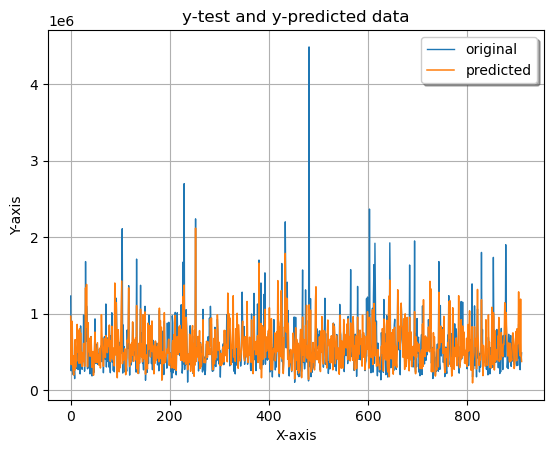

In [80]:
# Grafik plot data hasil dan data prediksi
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_test_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

# iX.Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [81]:
pipe_sgd

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['bedrooms',
                                                                                         'floors'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['sqft_living',
                                                                                         'sqft_above',
                                                                                         'sqft_basement'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'floors',
                                                   'sqft_above',
                                                   'sqft_basement']),
                                                 ('Categorical', 'passthrough',
                                                  ['view', 'condition',
                                                   'area'])])),
                ('regressor', SGDRegressor())])

In [83]:
# Menyimpan model menggunakan pickle
with open('final_pipe1.pkl', 'wb') as file:
    pickle.dump((pipe_sgd), file)

# X.Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

##### ***SAYA MENGERJAKAN MODEL INFERENCE DI FILE .IPYNB YANG BERBEDA***

# Xi.Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

- Setelah dilihat, hubungan antara harga rumah ternyata ada beberapa faktor yang secara signifikan berpengaruh terhadap harga rumah tersebut.
- Rumah yang memiliki view pantai memiliki harga yang lebih tinggi daripada yang lain.
- Usia rumah yang sudah tua bisa saja memiliki harga lebih tinggi dari rumah baru, apabila keaslian rumah nya tetap terjaga, biasanya target konsumen nya adalah orang-orang yang menyukai hal hal yang sudah berumur.
- Dari semua model yang saya pakai, model SGD Regressor adalah model yang memiliki nilai R2 yang paling bagus dibandingkan model yanglainnya.
- Hasil permodelan juga dapat dibilang Underfit, dengan nilai R2 hanya sebesar 0.47. hasil ini belum bisa digunakan untuk keperluan bisnis berskala besar.

# Conceptual Problems

> Jelaskan latar belakang adanya bagging dan cara kerja bagging !

**Latar belakang:**
- Adalah teknik penggabungan model dalam machine learning yang bertujuan untuk meningkatkan akurasi dan ketahanan model terhadap overfitting. Metode ini melibatkan pembuatan sejumlah model prediktif yang independen, biasanya menggunakan algoritma yang sama, namun dilatih pada subset acak dari data pelatihan dengan mengggunakan teknik bootstrap sampling.

**Cara kerja:** 
- **Bootstrap Sampling:**
    - Membuat sejumlah dataset baru dengan melakukan bootstrap sampling dari dataset pelatihan. Bootstrap sampling melibatkan pengambilan sampel acak dengan penggantian dari dataset pelatihan.
- **Model Independen:**
    - Pada setiap dataset hasil bootstrap, model (seperti decision tree, logistic regression, atau random forest) dilatih secara independen.
- **Prediksi Individual:**
    - Masing-masing model digunakan untuk membuat prediksi pada dataset uji atau data baru yang belum pernah dilihat sebelumnya. Dalam kasus klasifikasi, ini bisa berupa pemilihan kelas mayoritas dari model-model tersebut. Dalam kasus regresi, ini bisa berupa rata-rata prediksi dari model-model tersebut.
- **Aggregasi Prediksi:**
    - Prediksi agregat dievaluasi menggunakan metrik-metrik kinerja seperti akurasi, MSE (Mean Squared Error), atau metrik lainnya sesuai dengan jenis masalah yang diselesaikan. Evaluasi ini memberikan gambaran tentang sejauh mana model Bagging berhasil meningkatkan akurasi dan ketahanan terhadap overfitting dibandingkan dengan model tunggal.
- **Final Model(Opsional):**
    - Terkadang, semua model individu yang dilatih dapat digabungkan menjadi satu model gabungan, tergantung pada jenis algoritma yang digunakan. Contohnya, dalam Random Forest, model-model individu digabungkan menjadi satu pohon keputusan yang kompleks untuk meningkatkan kinerja.

> Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

**A.Random forest:**
- Random Forest menggunakan teknik bagging dengan bootstrap sampling. Setiap pohon (model) dibangun pada subset acak dari data pelatihan dengan penggantian.
- Keuntungannya adalah  membantu mengurangi overfitting dan variabilitas model dengan memastikan bahwa setiap pohon melihat variasi yang berbeda dari data.

**B.AdaBoost Regression:**
- Pada setiap iterasi, bobot diberikan pada data yang salah klasifikasi oleh model sebelumnya. Oleh karena itu, model berikutnya lebih fokus pada data yang sulit diklasifikasikan. Keuntungannya dapat memberikan perhatian lebih kepada data yang sulit, meningkatkan kinerja model pada kasus yang sulit.

> Jelaskan apa yang dimaksud dengan Cross Validation !

Cross-validation adalah suatu teknik statistika yang digunakan untuk mengevaluasi kinerja suatu model atau algoritma dengan menggunakan data yang terbatas. Tujuan utamanya adalah mengukur sejauh mana model yang telah dibuat dapat memberikan prediksi yang akurat pada data baru yang belum pernah dilihat sebelumnya.

Keuntungan : Menghindari Overfitting, Evaluasi yang Stabil, Pemilihan Model yang Optimal.